In [20]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


#### **Phase 1: Data Collection and Preparation**

In [21]:
# Task 1.2: Loading the dataset into pandas Dataframe
def load_data(file_path):
    """Load csv dataset into pandas Dataframe"""
    df = pd.read_csv(file_path)
    print("Shape:\n", df.shape)
    return df

url = "https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/EasyVisa%20(1).csv"

df = load_data(url)
df.head()

Shape:
 (25480, 12)


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
def dataset_summary(df):
    """ Summary for pandas dataset"""
    print("Dataset dtypes\n", df.dtypes)
    print("\nDataset Column\n", df.columns)
    print("\nDataset Shape\n", df.shape)
    print("\n\nDataset info\n", df.info())

dataset_summary(df)

Dataset dtypes
 case_id                   object
continent                 object
education_of_employee     object
has_job_experience        object
requires_job_training     object
no_of_employees            int64
yr_of_estab                int64
region_of_employment      object
prevailing_wage          float64
unit_of_wage              object
full_time_position        object
case_status               object
dtype: object

Dataset Column
 Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

Dataset Shape
 (25480, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-n

In [22]:
# Task 1.3: Inspect the dataset for missing values and handle them appropriately.
def check_missing_values(df):
    """Prints a summary of missing values in a pandas DataFrame"""
    missing = df.isnull().sum()
    # missing = missing[missing > 0]

    print("missing values found.\n")
    print(missing)

check_missing_values(df)

missing values found.

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64


No  missing value found

#### **Phase 2: Exploratory Data Analysis (EDA)**

 Feature: no_of_employees


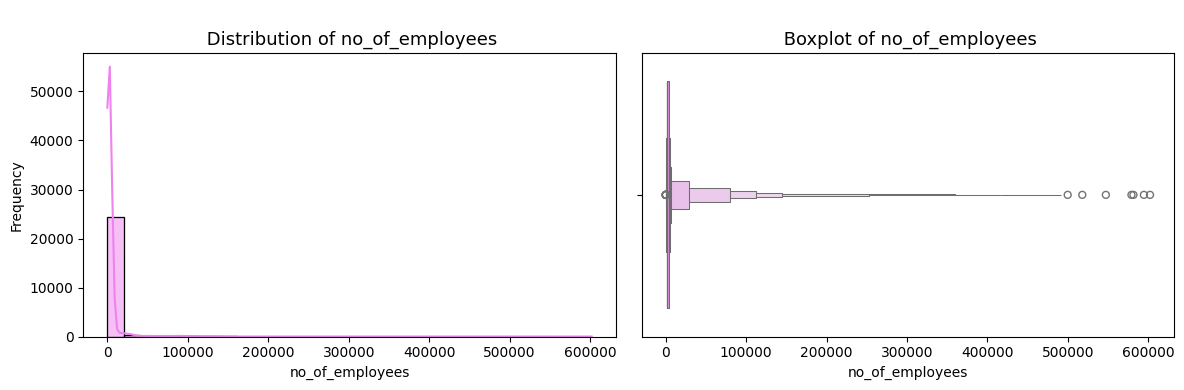

 Feature: yr_of_estab


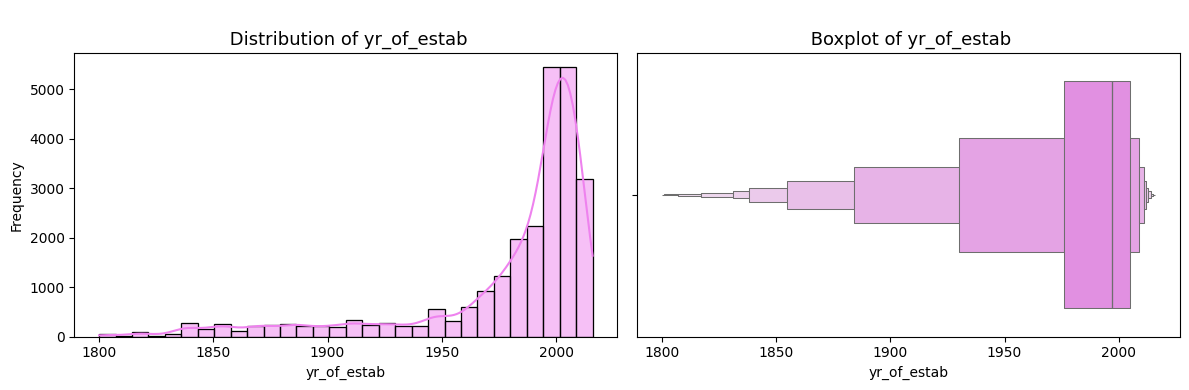

 Feature: prevailing_wage


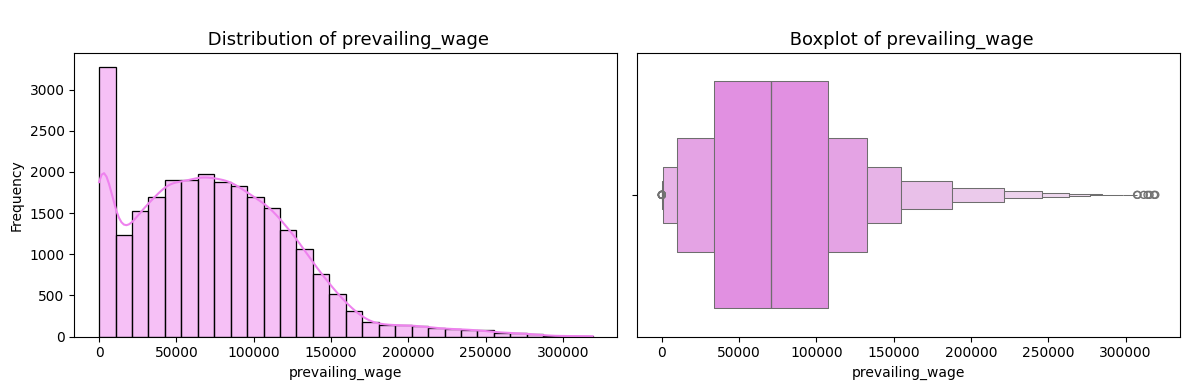

In [ ]:
# Task 2.1: Conduct exploratory data analysis to understand the distribution of features and the target variable .

df_copy = df.copy()
# selecting numerica columns
num_cols = df_copy.select_dtypes(include=['int64', 'float64']).columns
df[num_cols].describe().T

def univariate_numerical_data(df, column):
    """perform univariate EDA on a single numerical column, Display"""
    print(f" Feature: {column}")
    print("="*40)
    
    plt.figure(figsize=(12, 4))

    # Histogram + KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True, bins=30, color='violet')
    plt.title(f'\n Distribution of {column}', fontsize=13)
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxenplot(x=df[column], color="violet")
    plt.title(f"\n Boxplot of {column}", fontsize= 13)

    plt.tight_layout()
    plt.show()

for num in num_cols:
    univariate_numerical_data(df_copy, num)


Value counts


MemoryError: bad allocation

<Figure size 2.5482e+06x600 with 1 Axes>


Value counts


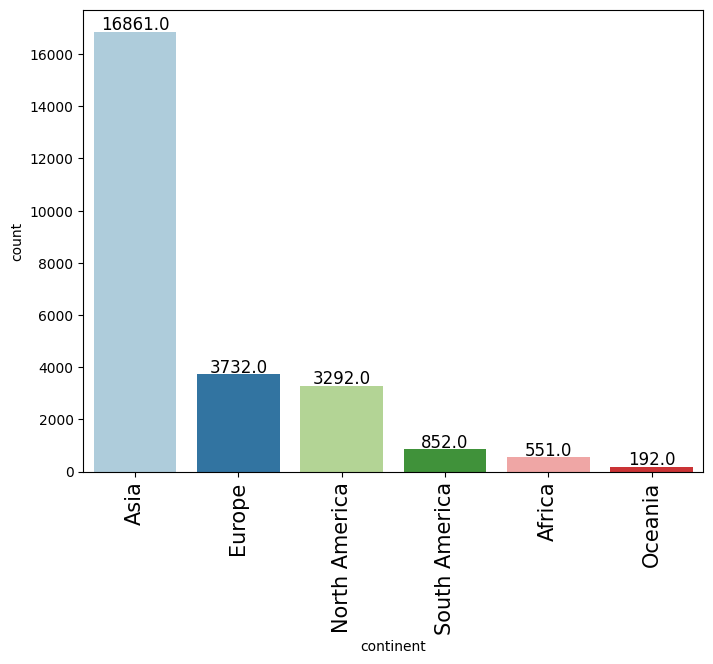


Value counts


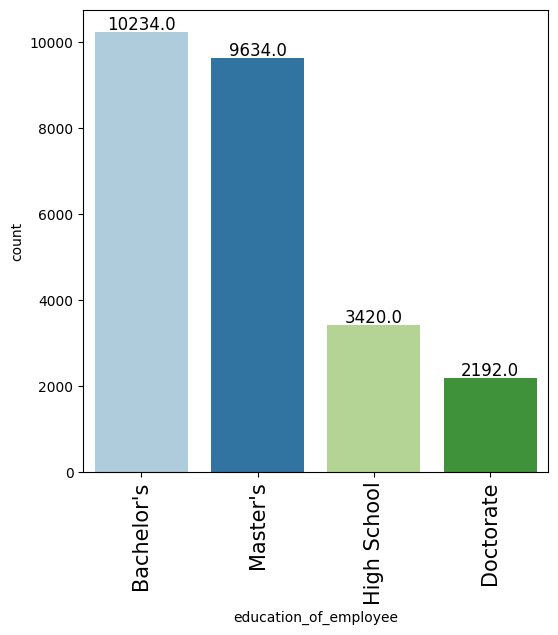


Value counts


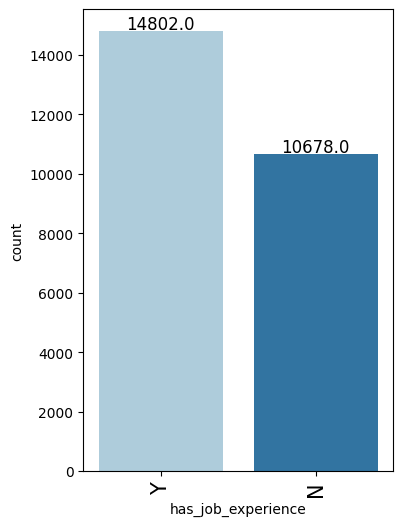


Value counts


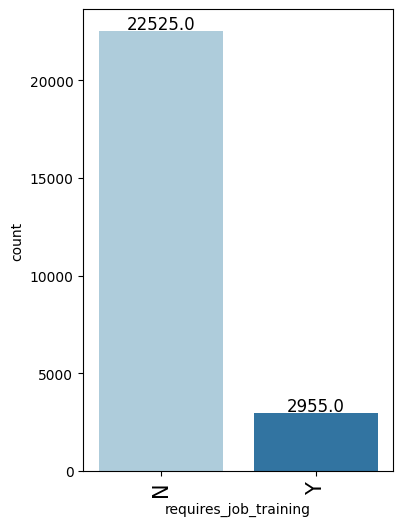


Value counts


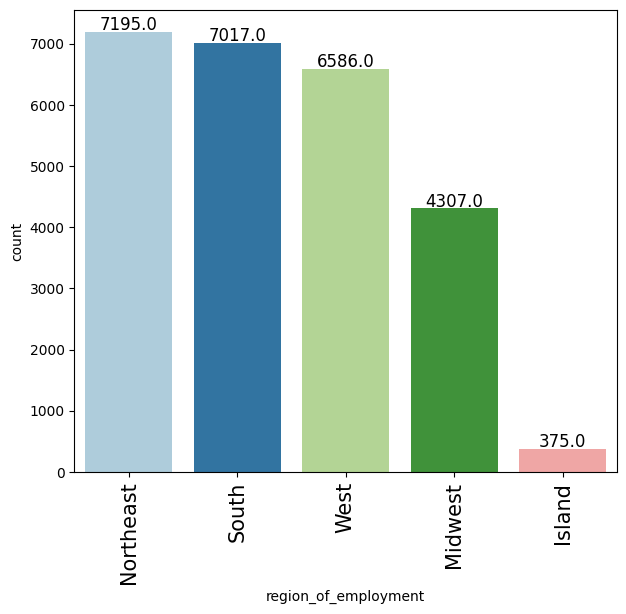


Value counts


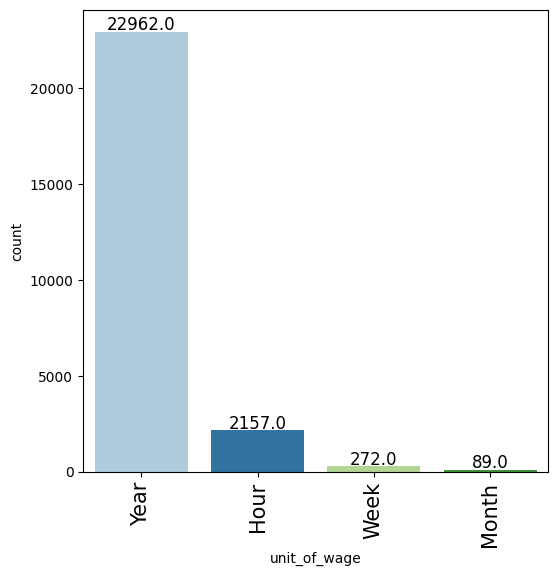


Value counts


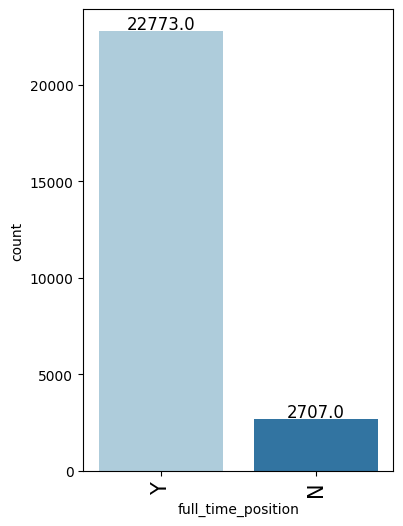

In [25]:
# selecting categorical column
cat_cols = df_copy.select_dtypes(include='object').columns.drop('case_status')

# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    print(f"\nValue counts")

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

for col in cat_cols:
    labeled_barplot(df_copy, col)